In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [322]:
# Считываем данные
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
# Добавим обозначение откуда эти данные
df_train['Dataset'] = 1
df_test['Dataset'] = 0
# Обьединим данные чтобы было удобнее их обрабатывать
df = pd.concat([df_train, df_test], ignore_index=True)
df.head()

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default,Dataset
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,36.0,Male,0.0,1
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,Tavern_district_4,7,2.5,-3,14,3.5,-3,5,29.0,Female,1.0,1
2,34822849,2016-02-18,2015-11-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_6,7,2.5,-3,8,2.5,-3,5,56.0,Female,0.0,1
3,46893387,2016-04-30,2016-03-22,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,13,2.5,-2,5,2.5,-3,5,27.0,Female,0.0,1
4,67128275,2016-09-19,2016-07-21,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,39,2.5,-3,7,2.5,-3,5,37.0,Female,0.0,1


### EDA

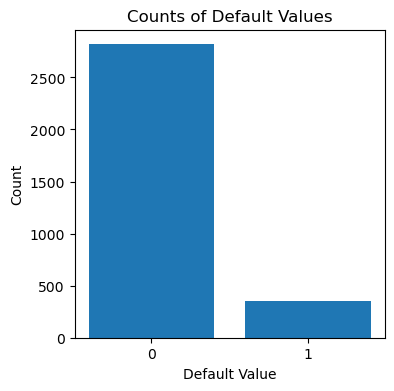

In [323]:
# Посмотрим на распределение таргета
count = df['Default'].value_counts()
plt.figure(figsize=(4,4))
plt.bar(count.index, count.values)
plt.xticks([0, 1])

plt.title('Counts of Default Values')
plt.xlabel('Default Value')
plt.ylabel('Count')

plt.show()

In [324]:
# Проверим все ли типы данны у нас в правильном формате. 
# Видим что некоторые данные связанные со временем надо будет перевести в datetime формат
df.dtypes

Deal_id                     int64
Deal_date                  object
First_deal_date            object
Secret_dwarf_info_1       float64
Secret_dwarf_info_2       float64
Secret_dwarf_info_3       float64
First_default_date         object
Successful_deals_count    float64
Region                     object
Tavern                      int64
Hashed_deal_detail_1      float64
Hashed_deal_detail_2        int64
Hashed_deal_detail_3        int64
Hashed_deal_detail_4      float64
Hashed_deal_detail_5        int64
Hashed_deal_detail_6        int64
Age                       float64
Gender                     object
Default                   float64
Dataset                     int64
dtype: object

In [325]:
# Посмотрим на данные в целом, есть ли пропуски и вылеты
df.describe(include=[float,int])

,Deal_id,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,Successful_deals_count,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Default,Dataset
count,4.157000e+03,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,4157.000000,3168.000000,4157.000000
mean,5.350620e+07,3.944444,-2.266667,5.280000,1.184211,13.338225,2.518523,-2.403897,8.755834,3.258239,-2.980515,5.0,36.561222,0.110795,0.762088
std,5.880875e+07,0.900599,0.764572,0.502339,1.901997,9.902927,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,10.834143,0.313928,0.425856
min,5.856790e+05,2.500000,-3.000000,5.000000,0.000000,2.000000,2.500000,-3.000000,5.000000,2.500000,-3.000000,5.0,20.000000,0.000000,0.000000
25%,3.083361e+07,3.500000,-3.000000,5.000000,0.000000,7.000000,2.500000,-3.000000,6.000000,2.500000,-3.000000,5.0,28.000000,0.000000,1.000000
50%,5.135061e+07,3.500000,-2.000000,5.000000,0.000000,7.000000,2.500000,-3.000000,8.000000,2.500000,-3.000000,5.0,34.000000,0.000000,1.000000
75%,6.759861e+07,4.500000,-2.000000,6.000000,2.000000,15.000000,2.500000,-3.000000,11.000000,2.500000,-3.000000,5.0,43.000000,0.000000,1.000000
max,8.652261e+08,9.500000,2.000000,8.000000,32.000000,81.000000,17.500000,78.000000,38.000000,37.500000,4.000000,5.0,76.000000,1.000000,1.000000


In [326]:
# проверим df на пропуски
df.isnull().sum()

Deal_id                      0
Deal_date                    0
First_deal_date              0
Secret_dwarf_info_1       3482
Secret_dwarf_info_2       3482
Secret_dwarf_info_3       3482
First_default_date        3482
Successful_deals_count      15
Region                      11
Tavern                       0
Hashed_deal_detail_1         0
Hashed_deal_detail_2         0
Hashed_deal_detail_3         0
Hashed_deal_detail_4         0
Hashed_deal_detail_5         0
Hashed_deal_detail_6         0
Age                          0
Gender                       0
Default                    989
Dataset                      0
dtype: int64

In [328]:
# Так как фитчи Secret_dwarf_info_1 Secret_dwarf_info_2 Secret_dwarf_info_3 
# имеют большое количество пропусков,порядка 83%, то целесообразние будет их удалить в дальнейшем из диатасета
round(df.describe(include=[float,int])['Secret_dwarf_info_1']['count']/ df.describe(include=[float,int])['Deal_id']['count'],2)

0.16

Посмотрим на распределение признаков в трейне и тесте

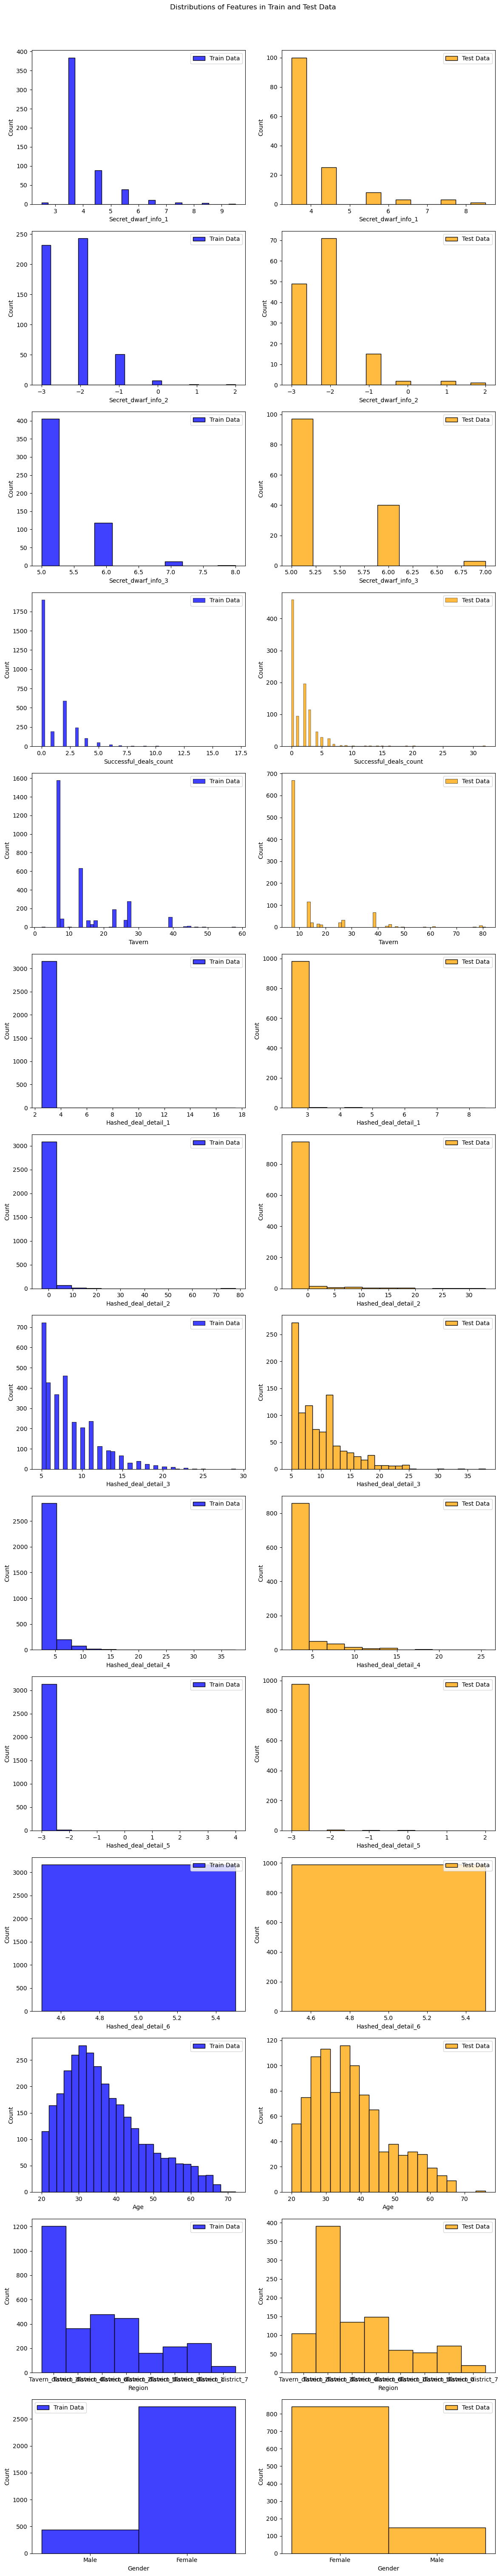

In [329]:
# Выберем признаки, для которых хотим построить распределения
selected_features = ['Secret_dwarf_info_1', 'Secret_dwarf_info_2','Secret_dwarf_info_3', 'Successful_deals_count', 'Tavern',
       'Hashed_deal_detail_1', 'Hashed_deal_detail_2', 'Hashed_deal_detail_3','Hashed_deal_detail_4', 'Hashed_deal_detail_5',
                    'Hashed_deal_detail_6', 'Age', 'Region','Gender']

# Создадим сетку графиков
fig, axes = plt.subplots(nrows=len(selected_features), ncols=2, figsize=(12, 60))

# Построим распределения для каждого признака
for i, feature in enumerate(selected_features):
    # Распределение для тренировочных данных
    sns.histplot(df[df['Dataset'] == 1][feature], ax=axes[i, 0], color='blue', label='Train Data')
    # Распределение для тестовых данных
    sns.histplot(df[df['Dataset'] == 0][feature], ax=axes[i, 1], color='orange', label='Test Data')

    # Добавим метки и заголовки
    axes[i, 0].set_xlabel(feature)
    axes[i, 1].set_xlabel(feature)
    axes[i, 0].legend()
    axes[i, 1].legend()

# Добавим общий заголовок
plt.suptitle('Distributions of Features in Train and Test Data', y=1.01)  # Размещаем заголовок над всеми графиками
plt.tight_layout()
plt.show()


### Выводы:

1. **Явных выбросов мы не наблюдаем**, зато видно большое количество пропусков в фичах:
   - *Secret_dwarf_info_1*
   - *Secret_dwarf_info_2*
   - *Secret_dwarf_info_3*
   - *First_default_date*
   <br>Можно предположить что эти фитчи связаны с First_default_date поэтому, вероятнее всего, их надо будет удалить из датасета, оствив только First_default_date как категориальный признак.
   <br>
      
   <br>
        
2. *Присутствует сильный дисбаланс классов.*

3. Есть немного пропусков в *Successful_deals_count* и *Region*. Заменим в будующем на моду

4. Признак *Hashed_deal_detail_6*	выглядит бесполезным в виду постоянности значений


### Работа с train датасетом. Разделение данных на тренировочные и валидационные

In [330]:
# Отсортируем данные по времени чтобы правильно их потом разбить на трейн и тест
df_train_sorted = df[df['Dataset'] == 1].sort_values(by='Deal_date')

In [331]:
# Определение доли данных для обучения и тестирования
train_ratio = 0.8
validation_ratio = 1 - train_ratio

# Определение индекса, разделяющего данные на обучающий и тестовый наборы
train_idx = int(train_ratio * len(df_train_sorted))

# Разделение данных на обучающий и тестовый наборы с учетом временной зависимости
train_data = df_train_sorted.iloc[:train_idx]
val_data = df_train_sorted.iloc[train_idx:]

In [332]:
# Для удобства дальнейшей работы сразу добавим отметку 2 в столбец  Dataset для валибационной выборки
# train = (train = 1 + val =2) и test = 0 
deal_id_val = val_data['Deal_id']

mask = df['Dataset'] == 1

df.loc[mask, 'Dataset'] = np.where(df.loc[mask, 'Deal_id'].isin(deal_id_val), 2, 1)

По итогу получили общий датасет где данные разделены на трейн валидацию и тест

### Обработка данных для всего (train+val+test) датасета, создание новых фитчей

In [333]:
# удалим столбец Hashed_deal_detail_6 так как это константа
df.drop(['Hashed_deal_detail_6'], axis=1, inplace=True)

In [334]:
# заполним пропуски в Successful_deals_count и Region модой
df['Successful_deals_count'].fillna(df['Successful_deals_count'].mode()[0], inplace=True)
df['Region'].fillna(df['Region'].mode()[0], inplace=True)

In [335]:
# проверим остались ли пропуски
df.isnull().sum()

Deal_id                      0
Deal_date                    0
First_deal_date              0
Secret_dwarf_info_1       3482
Secret_dwarf_info_2       3482
Secret_dwarf_info_3       3482
First_default_date        3482
Successful_deals_count       0
Region                       0
Tavern                       0
Hashed_deal_detail_1         0
Hashed_deal_detail_2         0
Hashed_deal_detail_3         0
Hashed_deal_detail_4         0
Hashed_deal_detail_5         0
Age                          0
Gender                       0
Default                    989
Dataset                      0
dtype: int64

In [336]:
# Переводим столбцы с датами в формат datetime чтобы потом было удобнее с ними работать (извлекать новые фитчи)
df['Deal_date'] = pd.to_datetime(df['Deal_date'])
df['First_deal_date'] = pd.to_datetime(df['First_deal_date'])
df['First_default_date'] = pd.to_datetime(df['First_default_date'])

# Проверяем изменения
print(df.dtypes)

Deal_id                            int64
Deal_date                 datetime64[ns]
First_deal_date           datetime64[ns]
Secret_dwarf_info_1              float64
Secret_dwarf_info_2              float64
Secret_dwarf_info_3              float64
First_default_date        datetime64[ns]
Successful_deals_count           float64
Region                            object
Tavern                             int64
Hashed_deal_detail_1             float64
Hashed_deal_detail_2               int64
Hashed_deal_detail_3               int64
Hashed_deal_detail_4             float64
Hashed_deal_detail_5               int64
Age                              float64
Gender                            object
Default                          float64
Dataset                            int64
dtype: object


Создание фитчей
1) Дней от первой сделки до текущей
2) Дней от дефолта до текущей сделки
3) Дней от первой сделки до дефолта
4) Закодировать Gender 1 0 
5) Применим OHE к категориальным фитчам  Region и Tavern
6) Есть предположение что дефолт может зависеть от дня недели и от дня месяца (дни зарплат)

In [337]:
# День месяца сделки
df['Deal_day_of_month'] = df['Deal_date'].dt.day
# День недели сделки
df['Deal_weekday'] = df['Deal_date'].dt.day_name()
# Месяц сделки
df['Deal_month'] = df['Deal_date'].dt.month

In [338]:
# Среднее число заказов в кажддый из дней месяца
average_orders_per_day_of_month = df.groupby(['Deal_month', 'Deal_day_of_month'], as_index=False)['Deal_id'].count().groupby('Deal_day_of_month')['Deal_id'].mean()
# Среднее число заказов в кажддый из дней недели
average_orders_per_weekday = df.groupby(['Deal_weekday', 'Deal_date'])['Deal_id'].count().groupby('Deal_weekday').mean()

In [339]:
average_orders_per_day_of_month.name = 'Average_deals_per_day'
df = df.merge(average_orders_per_day_of_month, on='Deal_day_of_month')

In [340]:
average_orders_per_weekday.name = 'Average_deals_per_weekday'
df = df.merge(average_orders_per_weekday, on='Deal_weekday')

In [341]:
# сколько дней является клиентом
df['Days_from_1st_deal'] = (df['Deal_date'] - df['First_deal_date']).dt.days

In [342]:
# Частота заказов c момента 1 прихода
df['Deals_frequency'] = df['Successful_deals_count'] /df['Days_from_1st_deal']

In [343]:
# Средний возраст клиента в Таверне или районе считаем только по трейн выборке
average_age_by_region = df[df['Dataset'] !=0].groupby('Region')['Age'].mean().reset_index()
average_age_by_tavern = df[df['Dataset'] !=0].groupby('Tavern')['Age'].mean().reset_index()


In [344]:
# Присвоение среднего возраста каждому клиенту в группе
df = pd.merge(df, average_age_by_region, on='Region', suffixes=('', '_average_by_region'))
df = pd.merge(df, average_age_by_tavern, on='Tavern', how='left', suffixes=('', '_average_by_tavern'))

In [345]:
#Заполним пропуски для Таверн из теста которых нет в трейн средним значением
df['Age_average_by_tavern'].fillna(average_age_by_tavern['Age'].mean())

0       37.065314
1       37.065314
2       35.709677
3       37.065314
4       37.065314
          ...    
4152    35.737008
4153    35.737008
4154    37.065314
4155    37.065314
4156    35.737008
Name: Age_average_by_tavern, Length: 4157, dtype: float64

In [347]:
# Через сколько дней случился 1 дефолт
# Если дефолта не было то это значение заменим на сколько дней человек является клиентом (или можно заменить на 999 для обхода случаев где клиент новый)
df['Days_to_1st_default_after_1st_deal'] = np.where(df['First_default_date'].isna(),
                                                    -999,
                                                    (df['First_default_date'] - df['First_deal_date']).dt.days
)

In [348]:
# Закодируем Gender male = 1 female = 0
df['Gender'] = np.where(df['Gender']  == 'Male',1,0)

In [349]:
# # # Гипотеза: Закодируем First_default_date на был \ небыл. 
df['Was_default'] = np.where(df['First_default_date'].isna(), 0, 1)
# # В итоге от этой идеи отказался из-за появления сильной корреляции с признаками выше.

In [351]:
# удалим все ненужные столбцы после того как создали фитчи
cols_to_droop = ['First_deal_date','First_default_date']
df.drop(cols_to_droop, axis=1,inplace=True)

In [ ]:
#Заполним пропуски в NaN признаках привязанных к дефолту выбросом - 999
df[['Secret_dwarf_info_1', 'Secret_dwarf_info_2', 'Secret_dwarf_info_3']].fillna(-999, inplace=True)

In [350]:
pd.set_option('display.max_columns', None)
df.head(3)

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,Default,Dataset,Deal_day_of_month,Deal_weekday,Deal_month,Average_deals_per_day,Average_deals_per_weekday,Days_from_1st_deal,Deals_frequency,Age_average_by_region,Age_average_by_tavern,Days_from_1st_default,Days_to_1st_default_after_1st_deal,Was_default
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaT,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,36.0,1,0.0,1,5,Thursday,11,10.5,7.0125,68,0.00000,36.263419,37.065314,-999.0,-999.0,0
1,22500921,2015-11-05,2015-03-29,NaN,NaN,NaN,NaT,2.0,Tavern_district_3,7,2.5,-3,7,2.5,-3,30.0,0,0.0,1,5,Thursday,11,10.5,7.0125,221,0.00905,36.263419,37.065314,-999.0,-999.0,0
2,22520190,2015-11-05,2015-09-22,NaN,NaN,NaN,NaT,0.0,Tavern_district_3,27,2.5,-3,6,2.5,-3,31.0,0,0.0,1,5,Thursday,11,10.5,7.0125,44,0.00000,36.263419,35.709677,-999.0,-999.0,0


In [352]:
# посмотрим сколько уникальных значений в каждой из категориальных фитчей (помимо дней)
df['Region'].nunique(),df['Tavern'].nunique()

(8, 23)

In [353]:
# закодируем через OHE, удалив 1 столбец чтобы не было мультиколинеарности
df = pd.get_dummies(df, columns=['Region', 'Tavern'], drop_first=True, dtype=int)

In [27]:
# # Гипотеза: закодируем Tavern через MTE чтобы не делать матрицу сильно разреженой
# means = df.groupby(df['Region'])['Default'].mean()
# noise = np.random.normal(0, 0.1, len(means))
# df['Region'] = df['Region'].map(means + noise)
# так как в некторых тавернах не было default то получим значение 0 сразу для нескольких такверн после кодировки, 
# а добавление noise только усугубит ситуацию сделав данные нерелевантными, поэтому оставим OHE для Tavern тоже


In [357]:
# Эта гипотеза не сработала, результаты стали хуже
# # закодируем через MTE день месяца и день недели добавив шум тем самым мы получим вероятность дефолта в каждый из дней
# # процедура делается на тестовой выборке и распространяется на валиацию и тест
day_of_month_default_prob = df[df['Dataset'] == 1].groupby('Deal_day_of_month')['Default'].mean()
day_of_week_default_prob = df[df['Dataset'] == 1].groupby('Deal_weekday')['Default'].mean()

np.random.seed(42)
noise_month = np.random.normal(0, 0.005, len(day_of_month_default_prob))
noise_week = np.random.normal(0, 0.005, len(day_of_week_default_prob))

df['Deal_day_of_month'] = df['Deal_day_of_month'].map(day_of_month_default_prob )
df['Deal_weekday'] = df['Deal_weekday'].map(day_of_week_default_prob)

In [358]:
# На последок проверим дату последней операции из трейна и первой из теста. 
# Видим что по времени у нас все в порядке: тестовее значения идут после тренировочных

# Последняя операция из трейна
last_operation_train = df[df['Dataset'] == 1]['Deal_date'].max()
print("Последняя операция из трейна:", last_operation_train)

# Первая операция из теста
first_operation_test = df[df['Dataset'] == 0]['Deal_date'].min()
print("Первая операция из теста:", first_operation_test)

Последняя операция из трейна: 2016-08-14 00:00:00
Первая операция из теста: 2016-10-01 00:00:00


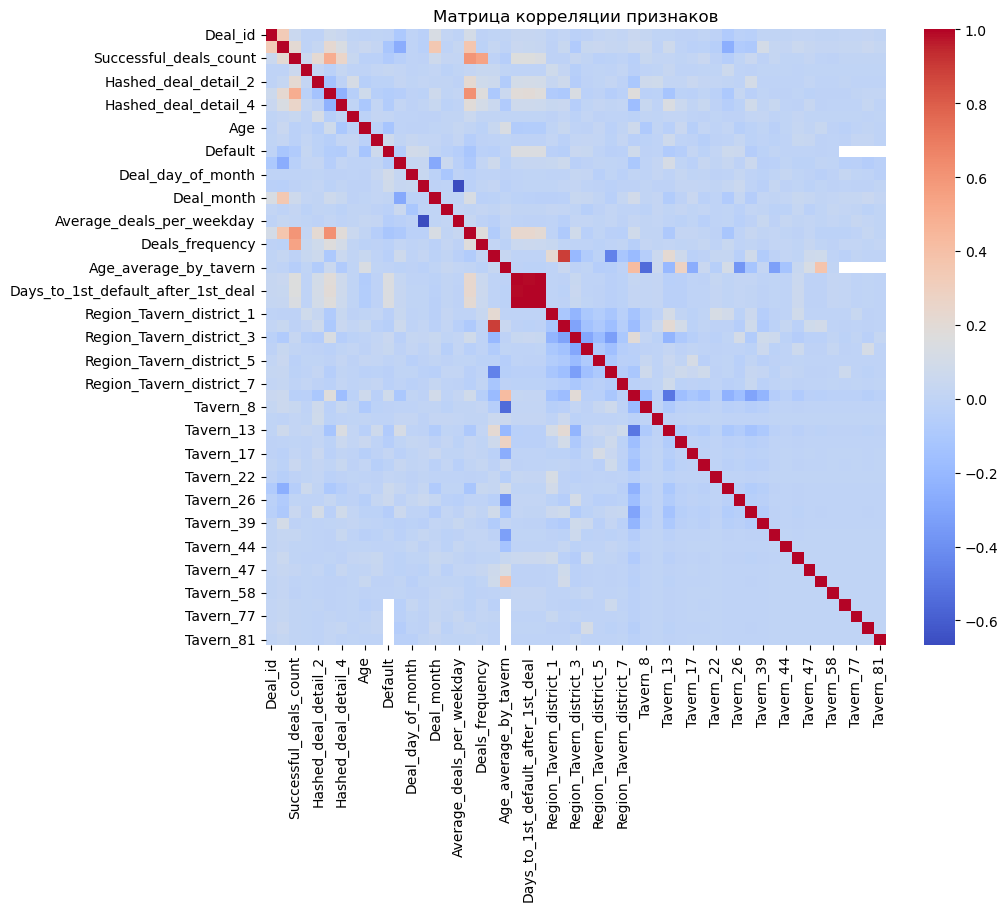

In [359]:
# Получить матрицу корреляции
correlation_matrix = df.corr()
# Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Матрица корреляции признаков')
plt.show()

In [360]:
# Отобразим только значений корреляции, превышающих 0.5 по модулю
high_correlation = correlation_matrix[(correlation_matrix.abs() > 0.5) & (correlation_matrix != 1)]

# Получить пары признаков и их соответствующие значения корреляции
pairs = []
for column in high_correlation.columns:
    for index, value in high_correlation[column].items():
        if not pd.isna(value):
            pairs.append((column, index, round(value,3)))

for pair in pairs:
    print(f"Пара признаков: {pair[0]}, {pair[1]}. Значение корреляции: {pair[2]}")

Пара признаков: Successful_deals_count, Days_from_1st_deal. Значение корреляции: 0.602
Пара признаков: Successful_deals_count, Deals_frequency. Значение корреляции: 0.54
Пара признаков: Hashed_deal_detail_3, Days_from_1st_deal. Значение корреляции: 0.621
Пара признаков: Deal_weekday, Average_deals_per_weekday. Значение корреляции: -0.668
Пара признаков: Average_deals_per_weekday, Deal_weekday. Значение корреляции: -0.668
Пара признаков: Days_from_1st_deal, Successful_deals_count. Значение корреляции: 0.602
Пара признаков: Days_from_1st_deal, Hashed_deal_detail_3. Значение корреляции: 0.621
Пара признаков: Deals_frequency, Successful_deals_count. Значение корреляции: 0.54
Пара признаков: Age_average_by_region, Region_Tavern_district_2. Значение корреляции: 0.894
Пара признаков: Age_average_by_tavern, Tavern_8. Значение корреляции: -0.545
Пара признаков: Days_from_1st_default, Days_to_1st_default_after_1st_deal. Значение корреляции: 0.991
Пара признаков: Days_from_1st_default, Was_defaul

In [365]:
df

,Deal_id,Deal_date,Successful_deals_count,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,Default,Dataset,Deal_day_of_month,Deal_weekday,Deal_month,Average_deals_per_day,Average_deals_per_weekday,Days_from_1st_deal,Deals_frequency,Age_average_by_region,Age_average_by_tavern,Days_from_1st_default,Days_to_1st_default_after_1st_deal,Was_default,Region_Tavern_district_1,Region_Tavern_district_2,Region_Tavern_district_3,Region_Tavern_district_4,Region_Tavern_district_5,Region_Tavern_district_6,Region_Tavern_district_7,Tavern_7,Tavern_8,Tavern_10,Tavern_13,Tavern_15,Tavern_17,Tavern_18,Tavern_22,Tavern_23,Tavern_26,Tavern_27,Tavern_39,Tavern_43,Tavern_44,Tavern_45,Tavern_47,Tavern_49,Tavern_58,Tavern_61,Tavern_77,Tavern_79,Tavern_81
0,22487461,2015-11-05,0.0,2.5,-3,8,2.5,-3,36.0,1,0.0,1,0.090909,0.091716,11,10.500000,7.012500,68,0.000000,36.263419,37.065314,-999.0,-999.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,22500921,2015-11-05,2.0,2.5,-3,7,2.5,-3,30.0,0,0.0,1,0.090909,0.091716,11,10.500000,7.012500,221,0.009050,36.263419,37.065314,-999.0,-999.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22520190,2015-11-05,0.0,2.5,-3,6,2.5,-3,31.0,0,0.0,1,0.090909,0.091716,11,10.500000,7.012500,44,0.000000,36.263419,35.709677,-999.0,-999.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,47522689,2016-05-05,2.0,2.5,-3,11,4.5,-3,36.0,0,0.0,1,0.090909,0.091716,5,10.500000,7.012500,227,0.008811,36.263419,37.065314,-999.0,-999.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,47531747,2016-05-05,0.0,2.5,-3,9,2.5,-3,47.0,1,0.0,1,0.090909,0.091716,5,10.500000,7.012500,208,0.000000,36.263419,37.065314,-999.0,-999.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,63696516,2016-08-31,0.0,2.5,-3,6,6.5,-3,39.0,0,0.0,2,0.076923,0.183183,8,15.285714,6.141176,290,0.000000,36.816667,35.737008,-999.0,-999.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4153,6355303,2016-08-31,3.0,2.5,-3,15,2.5,-3,41.0,0,0.0,2,0.076923,0.183183,8,15.285714,6.141176,281,0.010676,36.816667,35.737008,-999.0,-999.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4154,63588151,2016-08-31,0.0,2.5,-3,7,2.5,-3,22.0,1,0.0,2,0.076923,0.183183,8,15.285714,6.141176,73,0.000000,36.816667,37.065314,-999.0,-999.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4155,63560860,2016-08-31,4.0,2.5,-3,13,3.5,-3,34.0,1,0.0,2,0.076923,0.183183,8,15.285714,6.141176,459,0.008715,36.816667,37.065314,-999.0,-999.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [366]:
# удалим все ненужные столбцы после того как создали фитчи
cols_to_droop = ['Deal_month']
df.drop(cols_to_droop, axis=1,inplace=True)

### Работа с train датасетом. Разделение данных на тренировочные и валидационные

In [367]:
# Отсортируем данные по времени чтобы правильно их потом разбить на трейн и тест
df_train_sorted = df[df['Dataset'].isin([1, 2])].sort_values(by='Deal_date')

In [368]:
# Определение доли данных для обучения и тестирования
train_ratio = 0.8
validation_ratio = 1 - train_ratio

# Определение индекса, разделяющего данные на обучающий и тестовый наборы
train_idx = int(train_ratio * len(df_train_sorted))

# Разделение данных на обучающий и тестовый наборы с учетом временной зависимости
train_data = df_train_sorted.iloc[:train_idx]
val_data = df_train_sorted.iloc[train_idx:]

In [369]:
train_data['Default'].value_counts()

Default
0.0    2229
1.0     305
Name: count, dtype: int64

In [370]:
val_data['Default'].value_counts()

Default
0.0    588
1.0     46
Name: count, dtype: int64

Виим что отношение 1 к 0 в трейне 14% а в тесте 7%, первоначально отношение было 12% значит что такое разбиение нас в целом усраивает так как больше 1 у нас в тренировочном сете, значит лучше научимся предсказывать 1.

In [371]:
# Разделяем данные на обучающий и проверочный наборы
X_train = train_data.drop(columns=['Default','Deal_date','Dataset'])
y_train = train_data['Default']
X_val = val_data.drop(columns=['Default','Deal_date','Dataset'])
y_val = val_data['Default']

### Рассмотрим Baseline модель
В качестве базы можно взять логистическу регрессию и предсказать вероятность дефолта.
<br>
**В качестве метрики по условию берем ROC-AUC.**
<br>
Есть такая особенность что ROC_AUC может показать хороший скор, но на самом деле модель будет плохая.Поэтому при сильном дисбалансе надо дополнительно внимательно смотреть на предсказанные вероятности: так если для верхних вероятностей (близких к 1) она будет предсказывать 1(естественно), а на самом деле это 0, то это фиаско – модель плоха, а напомню что ROC_AUC в это время будет высоким. Т.е. мы выберем модель с большим ROC-AUC, но отсортировала она вероятности достаточно плохо.

In [372]:
pd.set_option('display.max_columns', None)
X_train.head()

,Deal_id,Successful_deals_count,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Age,Gender,Deal_day_of_month,Deal_weekday,Average_deals_per_day,Average_deals_per_weekday,Days_from_1st_deal,Deals_frequency,Age_average_by_region,Age_average_by_tavern,Days_from_1st_default,Days_to_1st_default_after_1st_deal,Was_default,Region_Tavern_district_1,Region_Tavern_district_2,Region_Tavern_district_3,Region_Tavern_district_4,Region_Tavern_district_5,Region_Tavern_district_6,Region_Tavern_district_7,Tavern_7,Tavern_8,Tavern_10,Tavern_13,Tavern_15,Tavern_17,Tavern_18,Tavern_22,Tavern_23,Tavern_26,Tavern_27,Tavern_39,Tavern_43,Tavern_44,Tavern_45,Tavern_47,Tavern_49,Tavern_58,Tavern_61,Tavern_77,Tavern_79,Tavern_81
251,585679,0.0,2.5,-3,5,2.5,-3,22.0,1,0.144578,0.149254,11.833333,5.808989,5,0.000000,36.263419,37.187500,-999.0,-999.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1987,5954693,0.0,2.5,-3,5,2.5,-3,30.0,0,0.176471,0.099773,11.750000,9.219512,14,0.000000,36.288462,37.065314,-999.0,-999.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3900,6829250,2.0,2.5,-2,5,2.5,-3,34.0,0,0.119565,0.149254,11.916667,5.808989,5,0.400000,36.816667,37.187500,-999.0,-999.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2929,6878449,2.0,2.5,-3,5,2.5,-3,23.0,0,0.159574,0.183183,10.666667,6.141176,12,0.166667,35.811715,37.065314,-999.0,-999.0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
264,7185789,0.0,2.5,-2,5,2.5,-3,32.0,0,0.150000,0.149254,11.416667,5.808989,28,0.000000,36.263419,37.187500,-999.0,-999.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [373]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model_baseline = LogisticRegression()

pipeline_baseline = Pipeline([
    ('scaler', StandardScaler()),  # Шаг стандартизации
    ('model', model_baseline)      # Шаг модели
])


pipeline_baseline.fit(X_train, y_train)


y_pred_proba_train = pipeline_baseline.predict_proba(X_train)[:, 1]  # Вероятность класса 1 (дефолт)
y_pred_proba_val = pipeline_baseline.predict_proba(X_val)[:, 1]  # Вероятность класса 1 (дефолт)

roc_auc_baseline_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_baseline_val = roc_auc_score(y_val, y_pred_proba_val)


print(f"ROC AUC Score на тренировочной выборке: {roc_auc_baseline_train:.3f}")
print(f"ROC AUC Scoreна валидационной выборке: {roc_auc_baseline_val:.3f}")

ROC AUC Score на тренировочной выборке: 0.790
ROC AUC Scoreна валидационной выборке: 0.699


Получили Baiseline качество ROC AUC Score: 0.739, переобучения нет, далее будем отталкиваться от него для поиска лучших моделей

### Рассмотрим другие модели

#### Random Forest

In [374]:
from  sklearn.ensemble import RandomForestClassifier

class_weights = {0: 1, 1: 7}  # задаем веса классов

model_randomforest = RandomForestClassifier(class_weight=class_weights)

model_randomforest.fit(X_train,y_train)

y_pred_proba_train = model_randomforest.predict_proba(X_train)[:, 1]  # Вероятность класса 1 (дефолт)
y_pred_proba_val = model_randomforest.predict_proba(X_val)[:, 1]  # Вероятность класса 1 (дефолт)

roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)


print(f"ROC AUC Score на тренировочной выборке: {roc_auc_train:.3f}")
print(f"ROC AUC Scoreна валидационной выборке: {roc_auc_val:.3f}")

ROC AUC Score на тренировочной выборке: 1.000
ROC AUC Scoreна валидационной выборке: 0.661


Получили явное переобучени. Попробуем настроить параметры.

In [400]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

# для временных данных используем TimeSeriesSplit. 
# Но так как данные в датасете (X_train,y_train) у нас уже отсортированы по времени, то можем его исползовать без столбца Date
splitter = TimeSeriesSplit(n_splits=4)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [15,18,22],  # Массив значений от 5 до 20
    'min_samples_split': [8,11,14],  # Массив значений от 5 до 20
    'min_samples_leaf': [20,30,40]  # Массив значений от 10 до 30 с шагом 2
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=splitter, scoring='roc_auc')

# Подгонка модели на тренировочных данных с использованием GridSearchCV
grid_search.fit(X_train, y_train)

# Получение лучших параметров модели
best_params = grid_search.best_params_

# Создание и обучение модели с лучшими параметрами
best_model_randomforest = RandomForestClassifier(**best_params)
best_model_randomforest.fit(X_train, y_train)

# Предсказание вероятности класса 1 для тренировочной и валидационной выборок с использованием лучшей модели
y_pred_proba_train_best = best_model_randomforest.predict_proba(X_train)[:, 1]
y_pred_proba_val_best = best_model_randomforest.predict_proba(X_val)[:, 1]

# Вычисление ROC AUC для тренировочной и валидационной выборок с использованием лучшей модели
roc_auc_best_train = roc_auc_score(y_train, y_pred_proba_train_best)
roc_auc_best_val = roc_auc_score(y_val, y_pred_proba_val_best)

print("Лучшие параметры модели:", best_params)
print(f"ROC AUC Score на тренировочной выборке с лучшей моделью: {roc_auc_best_train:.3f}")
print(f"ROC AUC Score на валидационной выборке с лучшей моделью: {roc_auc_best_val:.3f}")

Лучшие параметры модели: {'max_depth': 18, 'min_samples_leaf': 30, 'min_samples_split': 11, 'n_estimators': 100}
ROC AUC Score на тренировочной выборке с лучшей моделью: 0.846
ROC AUC Score на валидационной выборке с лучшей моделью: 0.699


#### CatBoost

In [42]:
from catboost import CatBoostClassifier

model_catboost = CatBoostClassifier(verbose=500)
model_catboost.fit(X_train,y_train)

Learning rate set to 0.015324
0:	learn: 0.6791333	total: 138ms	remaining: 2m 17s
500:	learn: 0.2480343	total: 3.39s	remaining: 3.38s
999:	learn: 0.1988379	total: 6.59s	remaining: 0us


In [43]:
y_pred_proba_train = model_catboost.predict_proba(X_train)[:, 1]  # Вероятность класса 1 (дефолт)
y_pred_proba_val = model_catboost.predict_proba(X_val)[:, 1]  # Вероятность класса 1 (дефолт)

roc_auc_train = roc_auc_score(y_train, y_pred_proba_train)
roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)


print(f"ROC AUC Score на тренировочной выборке: {roc_auc_train:.3f}")
print(f"ROC AUC Scoreна валидационной выборке: {roc_auc_val:.3f}")

ROC AUC Score на тренировочной выборке: 0.941
ROC AUC Scoreна валидационной выборке: 0.693


Видим сильное переобучение, попробуем поиграть с параметрами чтобы уменьшить переобучение

In [44]:
from sklearn.model_selection import GridSearchCV

# для временных данных используем TimeSeriesSplit. 
# Но так как данные в датасете (X_train,y_train) у нас уже отсортированы по времени, то можем его исползовать без столбца Date
splitter = TimeSeriesSplit(n_splits=4)

param_grid = {
    'iterations': [100, 300],
    'learning_rate': [0.05, 0.1],
    'depth': [2, 4, 8],
    'l2_leaf_reg': [2, 5, 8],
    'class_weights': [[1, 1],[7, 1]]  # Различные веса классов
}

grid_search = GridSearchCV(model_catboost, param_grid, cv=splitter, scoring='roc_auc')

grid_search.fit(X_train, y_train)


0:	learn: 0.6651764	total: 1.08ms	remaining: 107ms
99:	learn: 0.3734875	total: 183ms	remaining: 0us
0:	learn: 0.6643949	total: 1.2ms	remaining: 119ms
99:	learn: 0.3631563	total: 237ms	remaining: 0us
0:	learn: 0.6612140	total: 1.26ms	remaining: 124ms
99:	learn: 0.3507758	total: 329ms	remaining: 0us
0:	learn: 0.6600709	total: 6.43ms	remaining: 637ms
99:	learn: 0.3419912	total: 283ms	remaining: 0us
0:	learn: 0.6390335	total: 1.11ms	remaining: 110ms
99:	learn: 0.3232584	total: 181ms	remaining: 0us
0:	learn: 0.6374875	total: 924us	remaining: 91.5ms
99:	learn: 0.3330058	total: 240ms	remaining: 0us
0:	learn: 0.6313803	total: 1.06ms	remaining: 105ms
99:	learn: 0.3332630	total: 222ms	remaining: 0us
0:	learn: 0.6292075	total: 2.39ms	remaining: 236ms
99:	learn: 0.3247436	total: 276ms	remaining: 0us
0:	learn: 0.6655778	total: 1.19ms	remaining: 118ms
99:	learn: 0.3806171	total: 191ms	remaining: 0us
0:	learn: 0.6644156	total: 6.87ms	remaining: 680ms
99:	learn: 0.3643117	total: 239ms	remaining: 0us
0

299:	learn: 0.2650299	total: 1.11s	remaining: 0us
0:	learn: 0.6595067	total: 1.36ms	remaining: 408ms
299:	learn: 0.2687578	total: 1.01s	remaining: 0us
0:	learn: 0.6382495	total: 1.1ms	remaining: 329ms
299:	learn: 0.1337109	total: 766ms	remaining: 0us
0:	learn: 0.6374417	total: 1.24ms	remaining: 371ms
299:	learn: 0.1767522	total: 982ms	remaining: 0us
0:	learn: 0.6308104	total: 9.38ms	remaining: 2.8s
299:	learn: 0.2035899	total: 970ms	remaining: 0us
0:	learn: 0.6281535	total: 12.3ms	remaining: 3.67s
299:	learn: 0.2178476	total: 1.07s	remaining: 0us
0:	learn: 0.6649753	total: 1.05ms	remaining: 315ms
299:	learn: 0.2405311	total: 736ms	remaining: 0us
0:	learn: 0.6645018	total: 1.62ms	remaining: 485ms
299:	learn: 0.2635412	total: 832ms	remaining: 0us
0:	learn: 0.6609793	total: 1.26ms	remaining: 376ms
299:	learn: 0.2776366	total: 949ms	remaining: 0us
0:	learn: 0.6595934	total: 1.8ms	remaining: 539ms
299:	learn: 0.2798790	total: 1.03s	remaining: 0us
0:	learn: 0.6386379	total: 2.85ms	remaining:

99:	learn: 0.1150668	total: 186ms	remaining: 0us
0:	learn: 0.5366342	total: 1.24ms	remaining: 123ms
99:	learn: 0.1059865	total: 212ms	remaining: 0us
0:	learn: 0.5319648	total: 1.4ms	remaining: 138ms
99:	learn: 0.0985098	total: 216ms	remaining: 0us
0:	learn: 0.5298717	total: 1.5ms	remaining: 149ms
99:	learn: 0.0949773	total: 214ms	remaining: 0us
0:	learn: 0.6125158	total: 820us	remaining: 245ms
299:	learn: 0.1103434	total: 539ms	remaining: 0us
0:	learn: 0.6105738	total: 977us	remaining: 292ms
299:	learn: 0.1038609	total: 625ms	remaining: 0us
0:	learn: 0.6076271	total: 1.2ms	remaining: 358ms
299:	learn: 0.0970191	total: 653ms	remaining: 0us
0:	learn: 0.6065658	total: 12.4ms	remaining: 3.7s
299:	learn: 0.0938440	total: 695ms	remaining: 0us
0:	learn: 0.5400048	total: 1.07ms	remaining: 320ms
299:	learn: 0.1011974	total: 585ms	remaining: 0us
0:	learn: 0.5363662	total: 941us	remaining: 282ms
299:	learn: 0.0940994	total: 586ms	remaining: 0us
0:	learn: 0.5309887	total: 1.03ms	remaining: 307ms
2

99:	learn: 0.0823029	total: 781ms	remaining: 0us
0:	learn: 0.5296258	total: 5ms	remaining: 495ms
99:	learn: 0.0812613	total: 903ms	remaining: 0us
0:	learn: 0.6120483	total: 2.1ms	remaining: 208ms
99:	learn: 0.1032632	total: 653ms	remaining: 0us
0:	learn: 0.6112351	total: 2.99ms	remaining: 296ms
99:	learn: 0.0978985	total: 743ms	remaining: 0us
0:	learn: 0.6098310	total: 4.44ms	remaining: 440ms
99:	learn: 0.0910456	total: 767ms	remaining: 0us
0:	learn: 0.6098546	total: 18.8ms	remaining: 1.86s
99:	learn: 0.0890026	total: 841ms	remaining: 0us
0:	learn: 0.5393303	total: 1.47ms	remaining: 145ms
99:	learn: 0.0993975	total: 568ms	remaining: 0us
0:	learn: 0.5375977	total: 12.2ms	remaining: 1.21s
99:	learn: 0.0923909	total: 696ms	remaining: 0us
0:	learn: 0.5350892	total: 13ms	remaining: 1.28s
99:	learn: 0.0880848	total: 812ms	remaining: 0us
0:	learn: 0.5351517	total: 5.42ms	remaining: 537ms
99:	learn: 0.0822020	total: 861ms	remaining: 0us
0:	learn: 0.6141272	total: 2.53ms	remaining: 251ms
99:	le

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=None),
             estimator=<catboost.core.CatBoostClassifier object at 0x000001BA093F6E50>,
             param_grid={'class_weights': [[1, 1], [7, 1]], 'depth': [2, 4, 8],
                         'iterations': [100, 300], 'l2_leaf_reg': [2, 5, 8],
                         'learning_rate': [0.05, 0.1]},
             scoring='roc_auc')

In [45]:
# Получение лучших параметров модели
best_params = grid_search.best_params_

# Создание и обучение модели с лучшими параметрами
best_model_catboost = CatBoostClassifier(**best_params)
best_model_catboost.fit(X_train, y_train)

# Предсказание вероятности класса 1 для тренировочной и валидационной выборок с использованием лучшей модели
y_pred_proba_train_best = best_model_catboost.predict_proba(X_train)[:, 1]
y_pred_proba_val_best = best_model_catboost.predict_proba(X_val)[:, 1]

# Вычисление ROC AUC для тренировочной и валидационной выборок с использованием лучшей модели
roc_auc_best_train = roc_auc_score(y_train, y_pred_proba_train_best)
roc_auc_best_val = roc_auc_score(y_val, y_pred_proba_val_best)


0:	learn: 0.5218129	total: 10.6ms	remaining: 1.05s
1:	learn: 0.4017975	total: 16.4ms	remaining: 802ms
2:	learn: 0.3151717	total: 19.2ms	remaining: 621ms
3:	learn: 0.2542403	total: 21.4ms	remaining: 514ms
4:	learn: 0.2119750	total: 23.5ms	remaining: 446ms
5:	learn: 0.1803708	total: 25.2ms	remaining: 394ms
6:	learn: 0.1583461	total: 26.6ms	remaining: 354ms
7:	learn: 0.1415630	total: 28ms	remaining: 323ms
8:	learn: 0.1288134	total: 29.5ms	remaining: 298ms
9:	learn: 0.1199342	total: 38ms	remaining: 342ms
10:	learn: 0.1136636	total: 46.6ms	remaining: 377ms
11:	learn: 0.1086631	total: 50.1ms	remaining: 367ms
12:	learn: 0.1042245	total: 52.4ms	remaining: 351ms
13:	learn: 0.1010644	total: 54.5ms	remaining: 335ms
14:	learn: 0.0984620	total: 56.3ms	remaining: 319ms
15:	learn: 0.0964730	total: 58ms	remaining: 305ms
16:	learn: 0.0944532	total: 59.6ms	remaining: 291ms
17:	learn: 0.0934751	total: 60.9ms	remaining: 277ms
18:	learn: 0.0927359	total: 65.7ms	remaining: 280ms
19:	learn: 0.0921694	total: 

In [46]:
print("Лучшие параметры модели:", best_params)
print(f"ROC AUC Score на тренировочной выборке с лучшей моделью: {roc_auc_best_train:.3f}")
print(f"ROC AUC Score на валидационной выборке с лучшей моделью: {roc_auc_best_val:.3f}")

Лучшие параметры модели: {'class_weights': [7, 1], 'depth': 4, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
ROC AUC Score на тренировочной выборке с лучшей моделью: 0.805
ROC AUC Score на валидационной выборке с лучшей моделью: 0.737


#### k-NN c

In [47]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors=5)  # Используем 5 соседей

# pipeline_knn = Pipeline([
#     ('scaler', StandardScaler()),  # Шаг стандартизации
#     ('model', knn)     # Шаг модели
# ])

# pipeline_knn.fit(X_train, y_train)

# # Предсказание вероятности дефолта
# y_pred_proba_train = pipeline_knn.predict_proba(X_train)[:, 1]
# y_pred_proba_val = pipeline_knn.predict_proba(X_val)[:, 1]

# roc_auc_knn_train = roc_auc_score(y_train, y_pred_proba_train)
# roc_auc_knn_val = roc_auc_score(y_val, y_pred_proba_val)


# print(f"ROC AUC Score на тренировочной выборке: {roc_auc_knn_train:.3f}")
# print(f"ROC AUC Scoreна валидационной выборке: {roc_auc_knn_val:.3f}")

Попытаемся немного улучшить модель

In [48]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import TimeSeriesSplit

# def gaussian_kernel(distances, h=1):
#         return np.exp(- distances**2 / h**2)

# parameters_grid = {
#     'model__n_neighbors': [5, 10, 20],
#     'model__weights': ['uniform', 'distance', gaussian_kernel],
#     'model__p': [2, 1],  
# }

# splitter = TimeSeriesSplit(n_splits=4)

# grid_search = GridSearchCV(
#     pipeline_knn,
#     parameters_grid,
#     scoring='roc_auc',
#     cv=splitter,
#     verbose=100,
#     return_train_score=True
# )

# grid_search.fit(X_train, y_train)

In [49]:
# # Получение лучших параметров модели
# best_params = grid_search.best_params_

# # Создание и обучение модели с лучшими параметрами
# best_model_knn = pipeline_knn.set_params(**grid_search.best_params_)
# best_model_knn.fit(X_train, y_train)

# # Предсказание вероятности класса 1 для тренировочной и валидационной выборок с использованием лучшей модели
# y_pred_proba_train_best = pipeline_knn.predict_proba(X_train)[:, 1]
# y_pred_proba_val_best = pipeline_knn.predict_proba(X_val)[:, 1]

# # Вычисление ROC AUC для тренировочной и валидационной выборок с использованием лучшей модели
# roc_auc_best_train = roc_auc_score(y_train, y_pred_proba_train_best)
# roc_auc_best_val = roc_auc_score(y_val, y_pred_proba_val_best)

# print("Лучшие параметры модели:", best_params)
# print(f"ROC AUC Score на тренировочной выборке с лучшей моделью: {roc_auc_best_train:.3f}")
# print(f"ROC AUC Score на валидационной выборке с лучшей моделью: {roc_auc_best_val:.3f}")

#### SVM (работает плохо)

In [50]:
# from sklearn.svm import SVC

# pipeline_svm = Pipeline(
#     [
#         ('scaler', StandardScaler()),
#         ('SVC', SVC(probability=True))
#     ]
# )

# splitter = TimeSeriesSplit(n_splits=4)

# param_grid = {
#     'SVC__C': [1, 0.5, 3],
#     'SVC__kernel': ['linear', 'sigmoid', 'rbf'],
#     'SVC__gamma': ['scale', 'auto'],
#     'SVC__degree': [2, 3, 4],
#     'SVC__class_weight': [{0: 1, 1: 7}, None,'balanced']
# }

# grid_search = GridSearchCV(
#     pipeline_svm,
#     param_grid,
#     scoring="roc_auc",
#     cv=splitter,
#     return_train_score=True
# )

# grid_search.fit(X_train, y_train)

# pipeline_svm.set_params(**grid_search.best_params_)
# pipeline_svm.fit(X_train, y_train)

# y_pred_proba_train_best = pipeline_svm.predict_proba(X_train)[:, 1]
# y_pred_proba_val_best = pipeline_svm.predict_proba(X_val)[:, 1]

# roc_auc_best_train = roc_auc_score(y_train, y_pred_proba_train_best)
# roc_auc_best_val = roc_auc_score(y_val, y_pred_proba_val_best)

# print("Лучшие параметры модели:", grid_search.best_params_)  # Fix the variable name
# print(f"ROC AUC Score на тренировочной выборке с лучшей моделью: {roc_auc_best_train:.3f}")
# print(f"ROC AUC Score на валидационной выборке с лучшей моделью: {roc_auc_best_val:.3f}")


### Итоги. Обучение лучшей модели.

In [401]:
# Обучим лучшую модель на всем корпусе train
X_train_all = df_train_sorted.drop(['Default','Dataset','Deal_date',], axis=1)
y_train_all = df_train_sorted['Default']

In [402]:
best_model_randomforest.fit(X_train_all, y_train_all)

RandomForestClassifier(max_depth=18, min_samples_leaf=30, min_samples_split=11)

In [403]:
# Предскажем вероятность на трейне
df_test = df[df['Dataset'] == 0] 
df_test = df_test.drop(columns=['Default','Deal_date','Dataset'])

In [404]:
y_test_pred_proba = best_model_randomforest.predict_proba(df_test)[:, 1]

In [405]:
predictions_df = pd.DataFrame({'Deal_id': df_test['Deal_id'], 'Prediction': y_test_pred_proba})

In [406]:
predictions_df.head()

,Deal_id,Prediction
33,80349315,0.048083
34,80403033,0.060795
35,80361547,0.064656
36,80369031,0.226828
37,8032757,0.180364


In [407]:
predictions_df.to_csv('predictions_RF.csv', index=False)